# Health Financing in Uganda

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

health_budget = pd.read_csv('health_budget.csv')
aid_funding = pd.read_csv('aid_funding.csv')

Uganda's health system is primarily funded from two sources: The Government of Uganda, and external donors.

Uganda separates its health budget into six main areas:
* Clinical and public health
* Health research
* Health systems development
* Pharmaceutical and other supplies
* Policy, planning and support services, and
* Sector monitoring and quality assurance.

In most sectors, the majority of funding comes from external funding, mostly from donors.

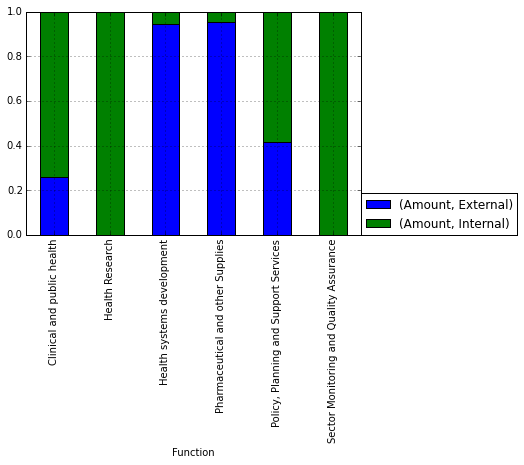

In [119]:
health_budget_fractions = (health_budget.groupby(['Function', 'Internal']).aggregate(np.sum) / health_budget.groupby(['Function']).aggregate(np.sum)).unstack()
plothbf = health_budget_fractions.plot(kind="bar", stacked=True)
plothbf.legend(loc=(1,0))

The Government of Uganda entirely funds Health Research and Sector Monitoring and Quality Assurance, and mostly funds Clinical and Public Health and Sector Monitoring and Quality Assurance. However, the majority of funding in the areas on Health Systems Development and Pharmaceutical and Other Supplies comes from sources external to the Government.

In these two areas, a large amount of funding is sourges from external sources, and this makes up, in fact, the vast majority of the Ugandan Health budget, both that for the 2014/2015 year, and that predicted for the 2015/2016 year.

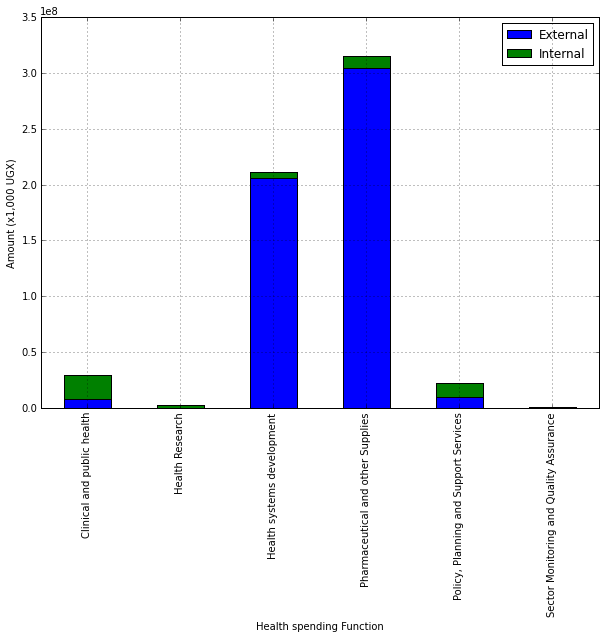

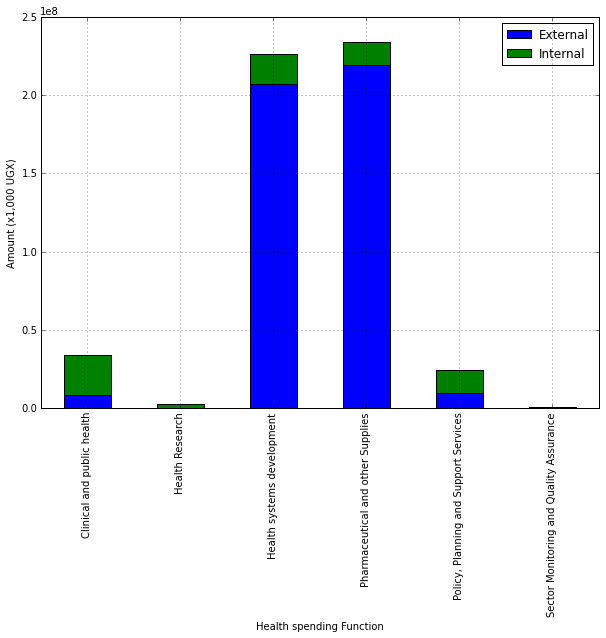

In [120]:
health_budget_by_internal14 = health_budget[health_budget["Year"] == "14/15"].groupby(['Function', 'Internal']).aggregate(np.sum).unstack()
plot14 = health_budget_by_internal14.plot(kind='bar', stacked=True, figsize=(10, 7))
plot14.set_xlabel("Health spending Function")
plot14.set_ylabel("Amount (x1,000 UGX)")
plot14.legend(["External", "Internal"])
health_budget_by_internal15 = health_budget[health_budget["Year"] == "15/16"].groupby(['Function', 'Internal']).aggregate(np.sum).unstack()
plot15 = health_budget_by_internal15.plot(kind='bar', stacked=True, figsize=(10, 7))
plot15.set_xlabel("Health spending Function")
plot15.set_ylabel("Amount (x1,000 UGX)")
plot15.legend(["External", "Internal"])

Looking purely at that funding provided by the Ugandan Government, most domestic funding goes to Clinical and public health, with smaller amounts going to Policy, Planning and Support Services, and Pharmaceuticals and other Supplies. The relatively low-funded areas of Health Research and Monitoring and Quality Assurance **DO THESE COMPARE WITH THE AUSTRALIAN/US FIGURES?**

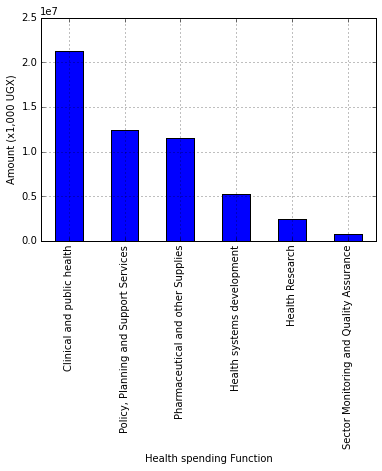

In [94]:
health_budget_internal = health_budget[(health_budget["Year"] == "14/15") & (health_budget["Internal"] == "Internal")].groupby("Function").aggregate(np.sum).sort(columns="Amount", ascending=False)
plothbi = health_budget_internal.plot(kind="bar", legend=None)
plothbi.set_xlabel("Health spending Function")
plothbi.set_ylabel("Amount (x1,000 UGX)")

The most striking feature of the Ugandan Health budget, however, is the large proportion, as much as 90%, of the health spend which comes from non-Governmental sources. This amount is projected to decrease in the coming 2015/2016 year, however.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11beca7b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a9e6780>], dtype=object)

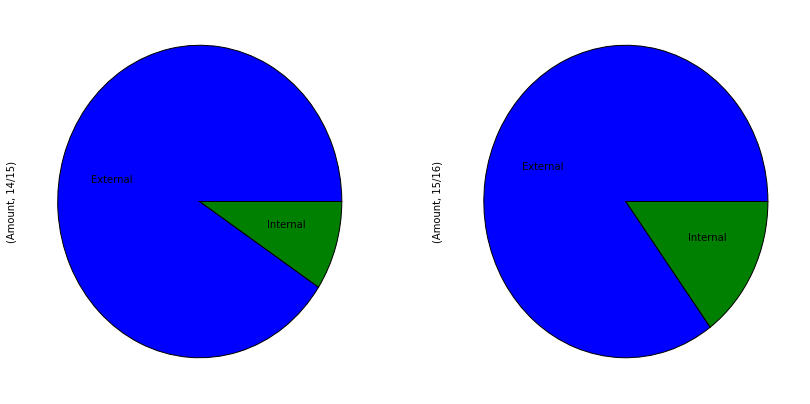

In [95]:
health_budget[["Year", "Internal", "Amount"]].groupby(["Internal", "Year"]).aggregate(np.sum).unstack().plot(kind='pie', subplots=True, figsize=(14, 7), legend=False, labeldistance=0.5, )

Part of this is due to a planned increase in domestic health spending by the Ugandan Government in the 2015/2016 financial year.

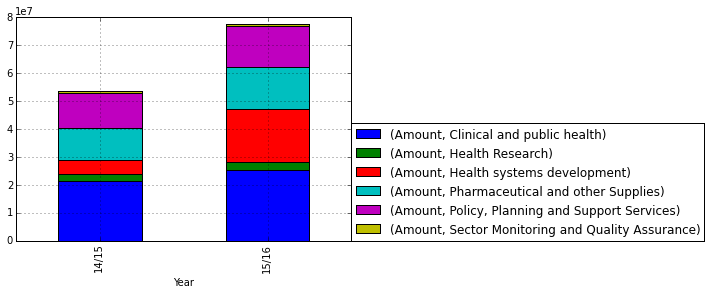

In [129]:
health_budget_internal_over_time = health_budget[health_budget["Internal"] == "Internal"][["Year", "Function", "Amount"]].groupby(["Year", "Function"]).aggregate(np.sum).unstack()
plothbit = health_budget_internal_over_time.plot(kind="bar", stacked=True)
plothbit.legend (loc=(1,0))

However, it is also partially due to a planned reduction in health expenditure in the country by non-Governmental sources.

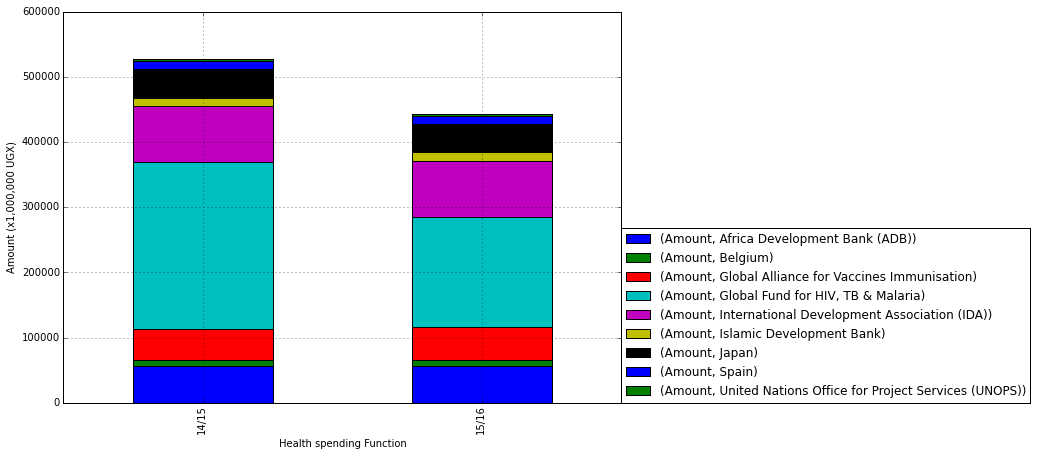

In [88]:
aid_funding_over_time = aid_funding[["Year", "Funder", "Amount"]].groupby(["Year", "Funder"]).aggregate(np.sum).unstack()
plotaid = aid_funding_over_time.plot(kind='bar', stacked=True, figsize=(10, 7))
plotaid.set_xlabel("Health spending Function")
plotaid.set_ylabel("Amount (x1,000,000 UGX)")
plotaid.legend(loc=(1, 0))